**Exploratory Data Analysis Mercado Livre**

In [505]:
import pandas as pd
import requests
import json

The first step is the definition of the function that will fetch the data stored in the Mercado Livre public API.

The product to be searched can be informed in the variable 'product'.

In [506]:
# Return the data in API
def search_data():
    # Connect with the public API, download the content in json format
    request = requests.get(f"https://api.mercadolibre.com/sites/MLB/search?q={product}")
    data = json.loads(request.content)

    return data

In [507]:
# Edit the variable product. Type the product to be researched, example: 'cofre', 'câmera de segurança', etc
product = "cofre"

In [508]:
# Store the data in json format
dataset = search_data()

**Investigating Data**

In the following step the dataset is investigated. The data download from the API is represented in a dictionary that contains several data and metadata, which is not ready to infer statistics and needs to be pre-processed.

The keys of the dictionary are evaluated in order to find which represents the most valuable data in terms of relevant information.

Initially the key result is the first to represent good data insights.

In [509]:
print(dataset.keys())

dict_keys(['site_id', 'country_default_time_zone', 'query', 'paging', 'results', 'sort', 'available_sorts', 'filters', 'available_filters', 'pdp_tracking'])


In [510]:
print(len(dataset['results']))

50


In [511]:
# Key 'results' dataframe
df = pd.DataFrame(dataset['results'])

In [512]:
df.head()

,id,title,condition,thumbnail_id,catalog_product_id,listing_type_id,permalink,buying_mode,site_id,category_id,...,installments,winner_item_id,catalog_listing,discounts,promotions,inventory_id,official_store_name,differential_pricing,variation_filters,variations_data
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,new,878844-MLA52871550631_122022,MLB20692931,gold_special,https://www.mercadolivre.com.br/cofre-eletrnic...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 12.59, 'rate': 16.6...",None,True,None,[],FRXY46302,NaN,NaN,NaN,NaN
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,new,970441-MLU72566189718_112023,MLB24472893,gold_special,https://www.mercadolivre.com.br/cofre-digital-...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 55.65, 'rate': 16.3...",None,True,None,[],ZOHW19162,NaN,NaN,NaN,NaN
2,MLB3548387589,Mini Cofre Parede Guarda Chaves Senha Airbnb J...,new,628796-MLU71349147191_082023,MLB26622695,gold_special,https://www.mercadolivre.com.br/mini-cofre-par...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 9, 'rate': 16.64, '...",None,True,None,[],APIJ69407,NaN,NaN,NaN,NaN
3,MLB3049617790,Cofre Digital Eletrônico Para Armas Jóias Docu...,new,688774-MLU74988940142_032024,MLB20222736,gold_special,https://www.mercadolivre.com.br/cofre-digital-...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 20.89, 'rate': 16.6...",None,True,None,[],XHWM51306,NaN,NaN,NaN,NaN
4,MLB3372390051,Cofre Eletrônico Digital Visor Lcd Teclado Sen...,new,741972-MLU72831732141_112023,MLB20794536,gold_special,https://www.mercadolivre.com.br/cofre-eletrnic...,buy_it_now,MLB,MLB33430,...,"{'quantity': 12, 'amount': 21.22, 'rate': 16.6...",None,True,None,[],WUKX66455,NaN,NaN,NaN,NaN


# **1. Investigation Columns**

In this step the daframe obtained from the API is investigated in order to find the columns which contain the most relevant information in terms of numeric and categorical values.

The goal is to generate a clean data frame that will be performed an exploratory analysis.

In [513]:
# Unique types in condition
df['condition'].unique()

array(['new'], dtype=object)

In [514]:
# Unique types in catalog_listing
df['catalog_listing'].unique()

array([ True, False])

In [515]:
# Unique types in listing_type_id
df['listing_type_id'].unique()

array(['gold_special', 'gold_pro'], dtype=object)

In [516]:
# Unique types in buying_mode
df['buying_mode'].unique()

array(['buy_it_now'], dtype=object)

In [517]:
# Unique types in price
df['price'].unique()

array([129.52, 573.99,  92.58, 214.91, 218.31, 472.69, 151.89,  76.53,
       297.5 , 228.96, 594.99, 108.  , 239.92, 497.46, 333.28, 700.61,
       160.  , 114.61, 309.9 , 117.  , 209.9 , 339.69, 104.  , 119.99,
        40.35,  64.9 ,  19.13,  59.46, 204.9 , 141.5 , 406.99,  76.84,
       147.  , 285.74, 169.9 , 182.  ,  78.98,  60.97, 959.9 , 129.99,
       799.9 , 447.  , 137.9 , 910.  , 279.9 , 237.  ])

In [518]:
# Unique types in original_price
df['original_price'].unique()

array([ 179.9 ,  699.99,     nan,  249.9 ,  239.9 ,  599.99,  151.89,
        119.99,  319.9 ,  228.96,  299.9 ,  769.9 ,  429.99,   22.9 ,
        314.  ,   67.  , 1000.  ])

In [519]:
# Unique types in sale_price
df['sale_price'].unique()

array([None], dtype=object)

In [520]:
# Unique types in sale_price
df['available_quantity'].unique()

array([ 500,  100,    1,  200,   50,  250, 5000])

In [521]:
# Each item of the shipping column has a dictionary embedded
df['shipping'][0]

{'store_pick_up': False,
 'free_shipping': True,
 'logistic_type': 'fulfillment',
 'mode': 'me2',
 'tags': ['fulfillment', 'self_service_in', 'mandatory_free_shipping'],
 'benefits': None,
 'promise': None,
 'shipping_score': -1}

In [522]:
# Unique types in stop_time
df['stop_time'].unique()

array(['2042-12-10T04:00:00.000Z', '2043-07-09T04:00:00.000Z',
       '2044-05-24T13:31:56.000Z', '2042-12-07T04:00:00.000Z',
       '2043-07-05T04:00:00.000Z', '2044-05-11T20:53:08.000Z',
       '2043-07-07T04:00:00.000Z', '2043-12-28T04:00:00.000Z',
       '2043-07-23T04:00:00.000Z', '2043-06-19T04:00:00.000Z',
       '2044-02-19T16:09:53.000Z', '2044-01-31T04:00:00.000Z',
       '2044-05-05T15:20:19.000Z', '2044-03-19T04:00:00.000Z',
       '2042-02-10T04:00:00.000Z', '2043-07-27T04:00:00.000Z',
       '2043-11-17T22:24:09.000Z', '2042-12-16T04:00:00.000Z',
       '2041-08-28T04:00:00.000Z', '2044-03-31T04:00:00.000Z',
       '2043-05-10T04:00:00.000Z', '2043-02-08T04:00:00.000Z',
       '2043-12-16T04:00:00.000Z', '2044-04-28T00:26:37.000Z',
       '2044-05-12T04:00:00.000Z', '2043-08-31T04:00:00.000Z',
       '2044-01-19T04:00:00.000Z', '2044-04-11T13:33:12.000Z',
       '2043-11-11T04:00:00.000Z', '2044-03-24T17:06:30.000Z',
       '2044-02-01T04:00:00.000Z', '2044-05-12T13:13:23

The column installments contain a dictionary in each element. This column is transformed into a new dataframe.

In [523]:
installments = pd.DataFrame(dict(df['installments']))

In [524]:
installments = installments.transpose()

In [525]:
installments.shape

(50, 4)

In [526]:
installments.head()

,quantity,amount,rate,currency_id
0,12,12.59,16.64,BRL
1,12,55.65,16.34,BRL
2,12,9,16.64,BRL
3,12,20.89,16.64,BRL
4,12,21.22,16.64,BRL


In [527]:
installments.drop(["currency_id"],axis='columns', inplace=True)

In [528]:
installments.head()

,quantity,amount,rate
0,12,12.59,16.64
1,12,55.65,16.34
2,12,9,16.64
3,12,20.89,16.64
4,12,21.22,16.64


# **2. New Data Frame**

In this step a new data frame is built with the most relevant columns for an exploratory data analysis.

Each column is scrutinized in order to find essential information. Some columns have dictionaries embedded in each row, so it is necessary to take a look and gather all essential the information in a new dataframe.

In [529]:
# Dropping not essential columns
df.drop(["condition","thumbnail_id", "catalog_product_id","listing_type_id","permalink", "buying_mode", "installments", "winner_item_id",
"discounts", "promotions", "inventory_id", "differential_pricing", "official_store_name", "variation_filters", "variations_data"],axis='columns', inplace=True)

In [530]:
df.head(1)

,id,title,site_id,category_id,domain_id,thumbnail,currency_id,order_backend,price,original_price,sale_price,available_quantity,official_store_id,use_thumbnail_id,accepts_mercadopago,shipping,stop_time,seller,attributes,catalog_listing
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,MLB,MLB33430,MLB-SAFES,http://http2.mlstatic.com/D_878844-MLA52871550...,BRL,1,129.52,179.9,None,500,NaN,True,True,"{'store_pick_up': False, 'free_shipping': True...",2042-12-10T04:00:00.000Z,"{'id': 1121312484, 'nickname': 'CLASP STORE'}","[{'id': 'BRAND', 'name': 'Marca', 'value_id': ...",True


In [531]:
# New dataframe from the column sellers
sellers = pd.DataFrame(dict(df["seller"]))
sellers = sellers.transpose()

In [532]:
sellers.head()

,id,nickname
0,1121312484,CLASP STORE
1,789812463,VERONA SHOP
2,102704303,NEBRASKA PARTS
3,1121312484,CLASP STORE
4,789812463,VERONA SHOP


In [533]:
# New dataframe from the column attributes, seleting the brand's name
brands ={
    "brand": []
}

for i in range(len(df["attributes"])):
  #print(df["attributes"][i][0]['value_name'])
  brands["brand"].append(df["attributes"][i][0]['value_name'])

brands = pd.DataFrame(brands)
brands.head()

,brand
0,Forkis
1,Forkis
2,Getwell
3,Forkis
4,Forkis


In [534]:
# Dropping new other columns
df.drop(["site_id","category_id","domain_id","thumbnail","currency_id","order_backend","official_store_id","use_thumbnail_id","accepts_mercadopago",
"shipping","seller","attributes","sale_price"],axis='columns', inplace=True)

In [535]:
df["brand"] = brands['brand']

In [536]:
df["seller"] = sellers["nickname"]

In [537]:
df.head(2)

,id,title,price,original_price,available_quantity,stop_time,catalog_listing,brand,seller
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,129.52,179.90,500,2042-12-10T04:00:00.000Z,True,Forkis,CLASP STORE
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,573.99,699.99,100,2043-07-09T04:00:00.000Z,True,Forkis,VERONA SHOP


**Final dataframe**

In [538]:
# Definitive data frame
data = pd.concat([df,installments],axis=1)
data.head(2)

,id,title,price,original_price,available_quantity,stop_time,catalog_listing,brand,seller,quantity,amount,rate
0,MLB3059005282,Cofre Eletrônico Digital Em Aço Teclado Senha ...,129.52,179.90,500,2042-12-10T04:00:00.000Z,True,Forkis,CLASP STORE,12,12.59,16.64
1,MLB3377629545,Cofre Digital Eletrônico Grande 50cm Senha E C...,573.99,699.99,100,2043-07-09T04:00:00.000Z,True,Forkis,VERONA SHOP,12,55.65,16.34


# **3. Exploratory Analysis**

In [539]:
# Number of rows and columns
data.shape

(50, 12)

In [540]:
# Gathering data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     object 
 1   title               50 non-null     object 
 2   price               50 non-null     float64
 3   original_price      22 non-null     float64
 4   available_quantity  50 non-null     int64  
 5   stop_time           50 non-null     object 
 6   catalog_listing     50 non-null     bool   
 7   brand               50 non-null     object 
 8   seller              50 non-null     object 
 9   quantity            45 non-null     object 
 10  amount              45 non-null     object 
 11  rate                45 non-null     object 
dtypes: bool(1), float64(2), int64(1), object(8)
memory usage: 4.5+ KB


Changing data type of values in int64,float 64 to int32, float32

In [541]:
data["price"] = data["price"].astype("float32").apply(lambda x: round(x, 2)) # rounding float value 2 decimals
data["original_price"] = data["original_price"].astype("float32").apply(lambda x: round(x, 2))
data["available_quantity"] =  data["available_quantity"].astype("int32")

In [542]:
# Count missing values in relevant columns
data.isna().sum(axis = 0)

id                     0
title                  0
price                  0
original_price        28
available_quantity     0
stop_time              0
catalog_listing        0
brand                  0
seller                 0
quantity               5
amount                 5
rate                   5
dtype: int64

In [543]:
# Replacing missing values with the element that appers the most in the table
data["quantity"] = data["quantity"].fillna("10")

In [544]:
# Replacing missing values with the mean
data["amount"] = data["amount"].fillna(data["amount"].mean())

In [545]:
data["rate"] = data["rate"].fillna(data["rate"].mean())

In [546]:
# Changing data types of columns in the object format to int and float
data["quantity"] = data["quantity"].astype("int32")
data["amount"] = data["amount"].astype("float32").apply(lambda x: round(x, 2)) # rounding float value 2 decimals
data["rate"] = data["rate"].astype("float32").apply(lambda x: round(x, 2))

In [547]:
# Gathering data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  50 non-null     object 
 1   title               50 non-null     object 
 2   price               50 non-null     float64
 3   original_price      22 non-null     float64
 4   available_quantity  50 non-null     int32  
 5   stop_time           50 non-null     object 
 6   catalog_listing     50 non-null     bool   
 7   brand               50 non-null     object 
 8   seller              50 non-null     object 
 9   quantity            50 non-null     int32  
 10  amount              50 non-null     float64
 11  rate                50 non-null     float64
dtypes: bool(1), float64(4), int32(2), object(5)
memory usage: 4.1+ KB


Taking a look at some categorical columns

In [548]:
# Counting brands
data.value_counts("brand")

brand
Forkis           9
Fercar           5
Cofres Lozano    4
Yale             3
Contelux         3
Animo Shop       3
Unyhome          2
Getwell          2
Lorben           2
Oria             2
PCI Eletro       2
SH               1
Xsafe            1
Western          1
Tssaper          1
Safewell         1
ACCAFT           1
Preto            1
Pado             1
Genérica         1
Fixser           1
DME              1
CCS              1
Ordene           1
Name: count, dtype: int64

In [549]:
# Counting sellers
data.value_counts("seller")

seller
SELLOR DISTRIBUIDORA           5
CLASP STORE                    4
COFRESLOZANO                   4
MAIKO_BRASIL                   3
CONTELUX                       3
ELETROEXPRESS-ML               2
LORBEN_OFICIAL                 2
NEBRASKA PARTS                 2
VERONA SHOP                    2
DUBAI.IMPORTADORA SP           2
MARCOS_DOS_SANTOS_JUNIOR       1
SHINE062                       1
RENOIMPORTS                    1
PERFETTO IMPORTS               1
PABER.                         1
TONGOU                         1
MEGA ALFA                      1
TOY SHOPPETS                   1
STOREONLINECAPIXABA            1
ACCAFT DISTRIBUIDORA           1
LEMENMATERIAISDECONSTRUCAOE    1
ANIMO SHOP                     1
JR2X                           1
INOVARMETAIS                   1
IMPRESSORAJATO.COM.BR          1
GSJ SANTOS                     1
FLYSEA                         1
FASTBRAS IMPORT                1
BF IMPORTS23                   1
BAGI7124038                    1
KEY

Describing numerical columns

In [550]:
data.describe()

,price,original_price,available_quantity,quantity,amount,rate
count,50.000000,22.000000,50.000000,50.000000,50.000000,50.00000
mean,246.460000,326.622273,157.660000,10.700000,28.801200,11.02000
std,229.912269,292.836454,708.544055,2.712405,20.950375,7.46835
min,19.130000,22.900000,1.000000,3.000000,3.910000,0.00000
25%,95.435000,80.247500,1.000000,10.000000,13.885000,0.00000
50%,164.950000,244.900000,1.000000,12.000000,23.320000,16.34000
75%,306.800000,557.490000,50.000000,12.000000,34.335000,16.64000
max,959.900000,1000.000000,5000.000000,12.000000,95.990000,16.64000


# **4. Visualizing Data**

In [551]:
import seaborn as sns
import matplotlib.pyplot as plt

Visualizing the amount of each brand present in the dataset

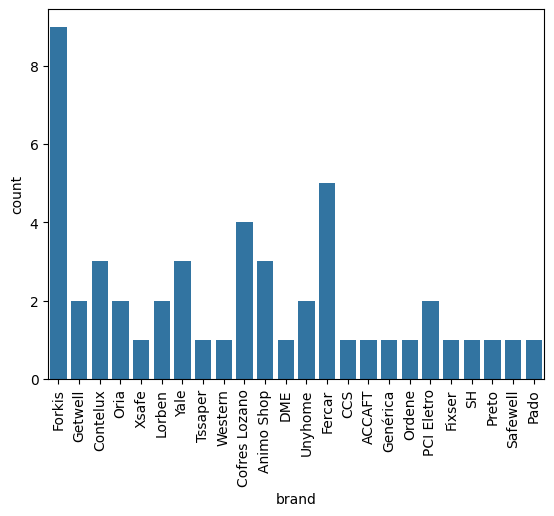

In [552]:
# Counting each brand amount
sns.countplot(data=data,x="brand")
plt.xticks(rotation=90)
plt.show()

Visualizing the top sellers

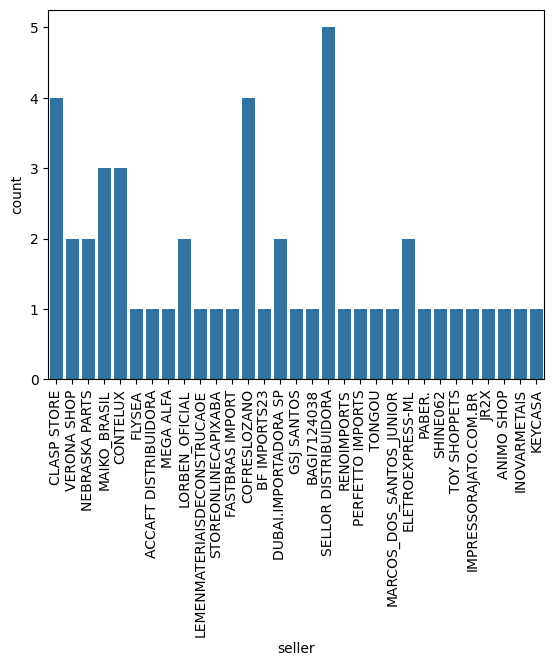

In [553]:
# Counting each seller
sns.countplot(data=data,x="seller")
plt.xticks(rotation=90)
plt.show()

Visualizing each brand product and their average prices

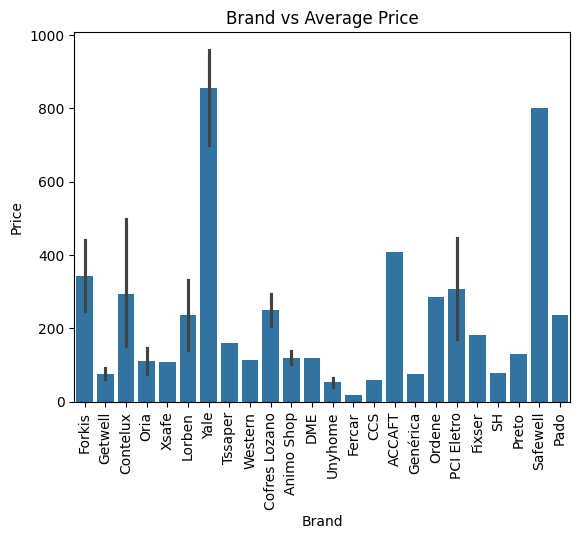

In [554]:
sns.barplot(data=data, x="brand", y="price")
plt.xlabel("Brand")
plt.xticks(rotation=90)
plt.ylabel("Price")
plt.title("Brand vs Average Price")
plt.show()

Grouping the dataset by seller and calculating their average price

In [555]:
data.groupby("seller")["price"].mean().apply(lambda x: round(x, 2)) # rounding float value 2 decimals

seller
ACCAFT DISTRIBUIDORA           228.96
ANIMO SHOP                     137.90
BAGI7124038                     64.90
BF IMPORTS23                   117.00
CLASP STORE                    294.84
COFRESLOZANO                   251.15
CONTELUX                       352.11
DUBAI.IMPORTADORA SP           124.99
ELETROEXPRESS-ML               308.45
FASTBRAS IMPORT                114.61
FLYSEA                          76.53
GSJ SANTOS                      40.35
IMPRESSORAJATO.COM.BR          959.90
INOVARMETAIS                   910.00
JR2X                           799.90
KEYCASA                        237.00
LEMENMATERIAISDECONSTRUCAOE    700.61
LORBEN_OFICIAL                 237.39
MAIKO_BRASIL                   369.96
MARCOS_DOS_SANTOS_JUNIOR       285.74
MEGA ALFA                      108.00
NEBRASKA PARTS                  98.29
PABER.                         182.00
PERFETTO IMPORTS                76.84
RENOIMPORTS                     59.46
SELLOR DISTRIBUIDORA            19.13
SHINE

In [556]:
data.groupby("brand")["price"].mean().apply(lambda x: round(x, 2)) # rounding float value 2 decimals

brand
ACCAFT           406.99
Animo Shop       119.63
CCS               59.46
Cofres Lozano    251.15
Contelux         292.77
DME              119.99
Fercar            19.13
Fixser           182.00
Forkis           342.39
Genérica          76.84
Getwell           76.78
Lorben           237.39
Ordene           285.74
Oria             111.77
PCI Eletro       308.45
Pado             237.00
Preto            129.99
SH                78.98
Safewell         799.90
Tssaper          160.00
Unyhome           52.62
Western          114.61
Xsafe            108.00
Yale             856.84
Name: price, dtype: float64

Grouping by seller and the brand they sell, along with the amount available

In [557]:
data[['seller','brand']].value_counts()

seller                       brand        
SELLOR DISTRIBUIDORA         Fercar           5
CLASP STORE                  Forkis           4
COFRESLOZANO                 Cofres Lozano    4
MAIKO_BRASIL                 Forkis           3
CONTELUX                     Contelux         2
LORBEN_OFICIAL               Lorben           2
ELETROEXPRESS-ML             PCI Eletro       2
VERONA SHOP                  Forkis           2
TONGOU                       Oria             1
TOY SHOPPETS                 Getwell          1
STOREONLINECAPIXABA          Tssaper          1
SHINE062                     SH               1
RENOIMPORTS                  CCS              1
PERFETTO IMPORTS             Genérica         1
PABER.                       Fixser           1
NEBRASKA PARTS               Getwell          1
                             Animo Shop       1
MEGA ALFA                    Xsafe            1
MARCOS_DOS_SANTOS_JUNIOR     Ordene           1
ACCAFT DISTRIBUIDORA         Contelux        